# Análisis exploratorio de las consecuencias del covid 19 y el voto en EEUU
---------------------------

El objetivo de este estudio es analizar la relación entre las consecuencias que ha tenido el covid y la intención de voto de los estadiunidenses. 
Las potenciales consecuencias que se han considerado son la preocupación, haber cogido el virus, que un allegado haya cogido el virus, que un allegado haya fallecido, haber tenido que dejar el trabajo para cuidar de un familiar y haber perdido el trabajo.  Además, se ha generado una nueva variable denominada cercanía al covid, que hace referencia a la cantidad de estas consecuencias a las que cada persona ha sido expuesta. 

En principio, se esperaba que aquellas personas que han sufrido mayor cantidad este tipo de consecuencias, tendrían más intención de voto y estarían más a favor del candidato Biden ya que parece haberse tomado más en serio las políticas de control de la pandemia.

También se contrastan otros aspectos que se consideró de interés como el grado de cercanía al covid en función del nivel de ingresos (estudio 2), el método de voto elegido en función de la ideología (estudio 3) y la cantidad de gente que se contagió en función de la ideología (estudio 4).

Se va a trabajar con una base de datos del grupo fivethirtyeight (https://data.fivethirtyeight.com/).

-----------------------------------------------

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

#### PREPROCESAMIENTO

In [2]:
df=pd.read_csv('nonvoters.csv')
df=df.loc[:,['Q11_1','Q11_2','Q11_3','Q11_4','Q11_5','Q11_6','race','gender','income_cat','voter_category','Q21','Q23','Q24','Q30']]

In [3]:
df.rename(columns={'Q21':'vote_intention', 'Q23':'vote_who', 'Q24': 'method', 'Q30':'ideology'},inplace=True)

In [4]:
print(df.head(10))

   Q11_1  Q11_2  Q11_3  Q11_4  Q11_5  Q11_6         race  gender  \
0      2      2      2      2      2      2        White  Female   
1      2      2      1      2      2      2        White  Female   
2      2      2      1      2      1      2        White    Male   
3      1      2      2      2      1      2        Black  Female   
4      2      2      1      2      2      2        White    Male   
5      2      2      2      1      2      2        White  Female   
6      2      2      2      2      2      2        White  Female   
7      2      2      2      2      2      2  Other/Mixed  Female   
8      2      2      2      2      2      2        White    Male   
9      2      2      1      2      2      2        White    Male   

      income_cat voter_category  vote_intention  vote_who  method  ideology  
0       $75-125k         always               1         2       1         2  
1  $125k or more         always               1         1       3         3  
2  $125k or more 

In [5]:
indexNames = df[ (df['vote_intention'] == -1) | (df['vote_who'] == -1) | (df['method'] == -1)| (df['ideology'] == -1) |
               (df['Q11_1'] == -1) | (df['Q11_2'] == -1) |(df['Q11_3'] == -1) | (df['Q11_4'] == -1) | (df['Q11_5'] == -1) | (df['Q11_6'] == -1)].index
df.drop(indexNames , inplace=True)

----------------------------------------------------------

### ESTUDIO UNIVARIANTE

##### Análisis de la VD: Intención de voto de los estadounidenses

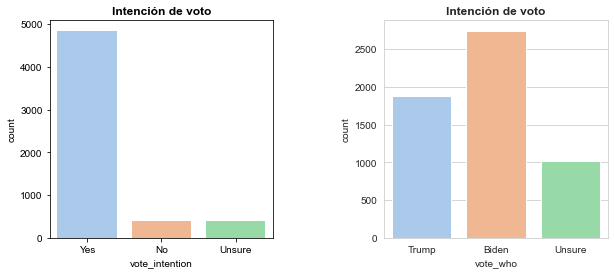

In [6]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(data= df, x= 'vote_intention',y='Q11_1', estimator = len, palette='pastel')
plt.ylabel('count')
sns.set_style('whitegrid')
plt.title('Intención de voto', fontweight = 'bold')
plt.xticks([0,1,2], labels=['Yes', 'No','Unsure'])

plt.subplot(1,2,2)
sns.barplot(data= df, x= 'vote_who',y='Q11_1', estimator = len, palette='pastel')
plt.ylabel('count')
plt.title('Intención de voto', fontweight = 'bold')
plt.xticks([0,1,2], labels=['Trump', 'Biden','Unsure'])
sns.set_style('whitegrid')
plt.subplots_adjust(wspace = 0.5)
plt.show()

Casi todos los ecuentados tenían intención de votar en las elecciones, además parece que el candidato más votado fue Biden, con una diferencia de casi 1000 votos sobre Trump.

##### Análisis de la covariable cercanía al covid de los estadounidenses

In [7]:
df.rename(columns={'Q11_1':'perdio_trabajo','Q11_2':'cogio_covid','Q11_3':'allegado_covid','Q11_4':'allegado_fallece','Q11_5':'preocupado','Q11_6':'dejo_trabajo',},inplace=True)

In [8]:
df.loc[:,'perdio_trabajo':'dejo_trabajo']=df.loc[:,'perdio_trabajo':'dejo_trabajo'].replace(2,0)
df.loc[:,'vote_who']=df.loc[:,'vote_who'].replace(1,'Trump')
df.loc[:,'vote_who']=df.loc[:,'vote_who'].replace(2,'Biden')
df.loc[:,'vote_who']=df.loc[:,'vote_who'].replace(3,'Unsure')

In [9]:
df['closeness']= df.perdio_trabajo+df.dejo_trabajo+df.allegado_covid+df.allegado_fallece+df.cogio_covid+df.preocupado

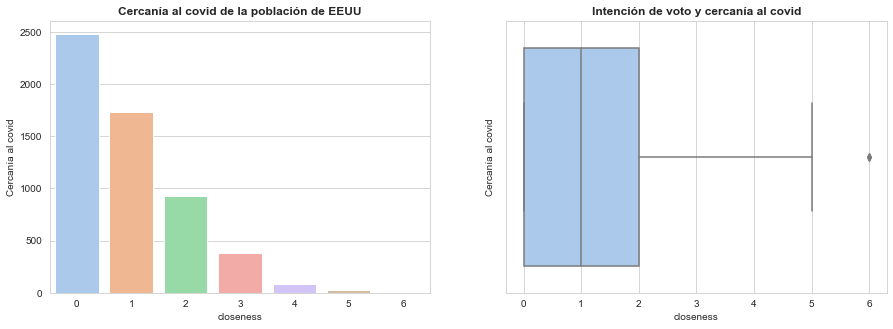

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df.closeness, palette='pastel')
plt.ylabel('Cercanía al covid')
plt.title('Cercanía al covid de la población de EEUU', fontweight = 'bold')
sns.set_style('whitegrid')

plt.subplot(1,2,2)
sns.boxplot( data= df, x= 'closeness',  palette='pastel')
plt.ylabel('Cercanía al covid')
plt.title('Intención de voto y cercanía al covid', fontweight = 'bold')
sns.set_style('whitegrid')
plt.subplots_adjust(hspace = 0.5)
plt.show()

Por encima de 1500 personas de nuestra muestra han tenido alguna incidencia provocada por la pandemia como haber perdido su trabajo, haberlo cogido ellos mismos o un familiar, estar preocupado... No obstante la mayor parte de las personas no han sufrido ninguna de estas consecuencias. El número de personas que ha sufrido 2 ,3, 4, 5 o 6 de ellas al mismo tiempo es considerablemente reducido.

##### Prevalencia de cada tipo de incidencia en EEUU

In [11]:
suma=[]
variables=['perdio_trabajo','cogio_covid','allegado_covid','allegado_fallece','preocupado','dejo_trabajo']
for variable in variables:
    suma.append(sum(df[variable]))
suma

[745, 125, 2222, 761, 1259, 107]

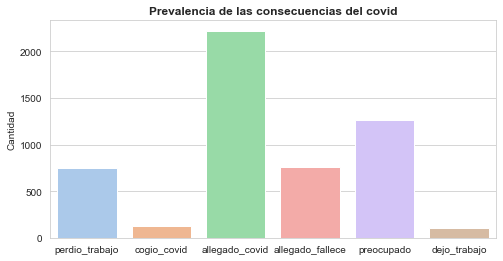

In [12]:
plt.figure(figsize=(8,4))
sns.barplot(x=variables,y=suma, palette='pastel')
plt.ylabel('Cantidad')
plt.title('Prevalencia de las consecuencias del covid', fontweight = 'bold')
sns.set_style('whitegrid')

La consecuencia provocada por el covid más común ha sido que un allegado haya cogido el virus, seguida de estar preocupado. Cabe resaltar que hay menos personas preocupadas por el virus que personas con un allegado que lo haya pillado.

Las consecuencias menos comunes han sido que las personas hayan tenido que dejar su trabajo para cuidar de un fmailiar y que la persona cogiese el covid.

De las 5633 personas personas encuentadas, 745 perdieron su trabajo como consecuencia del covid. Esto supone un 13.3% de todos los encuestados. 

---------------------------------------------

### ESTUDIO EXPLORATORIO MULTIVARIANTE

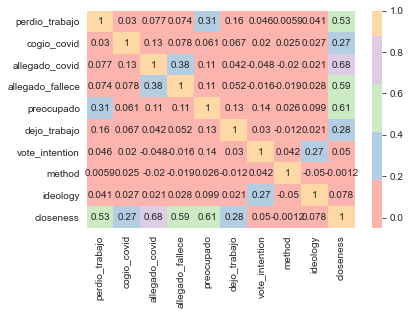

In [13]:
sns.heatmap(df.corr(), annot = True, center=True, cmap='Pastel1')
plt.show()

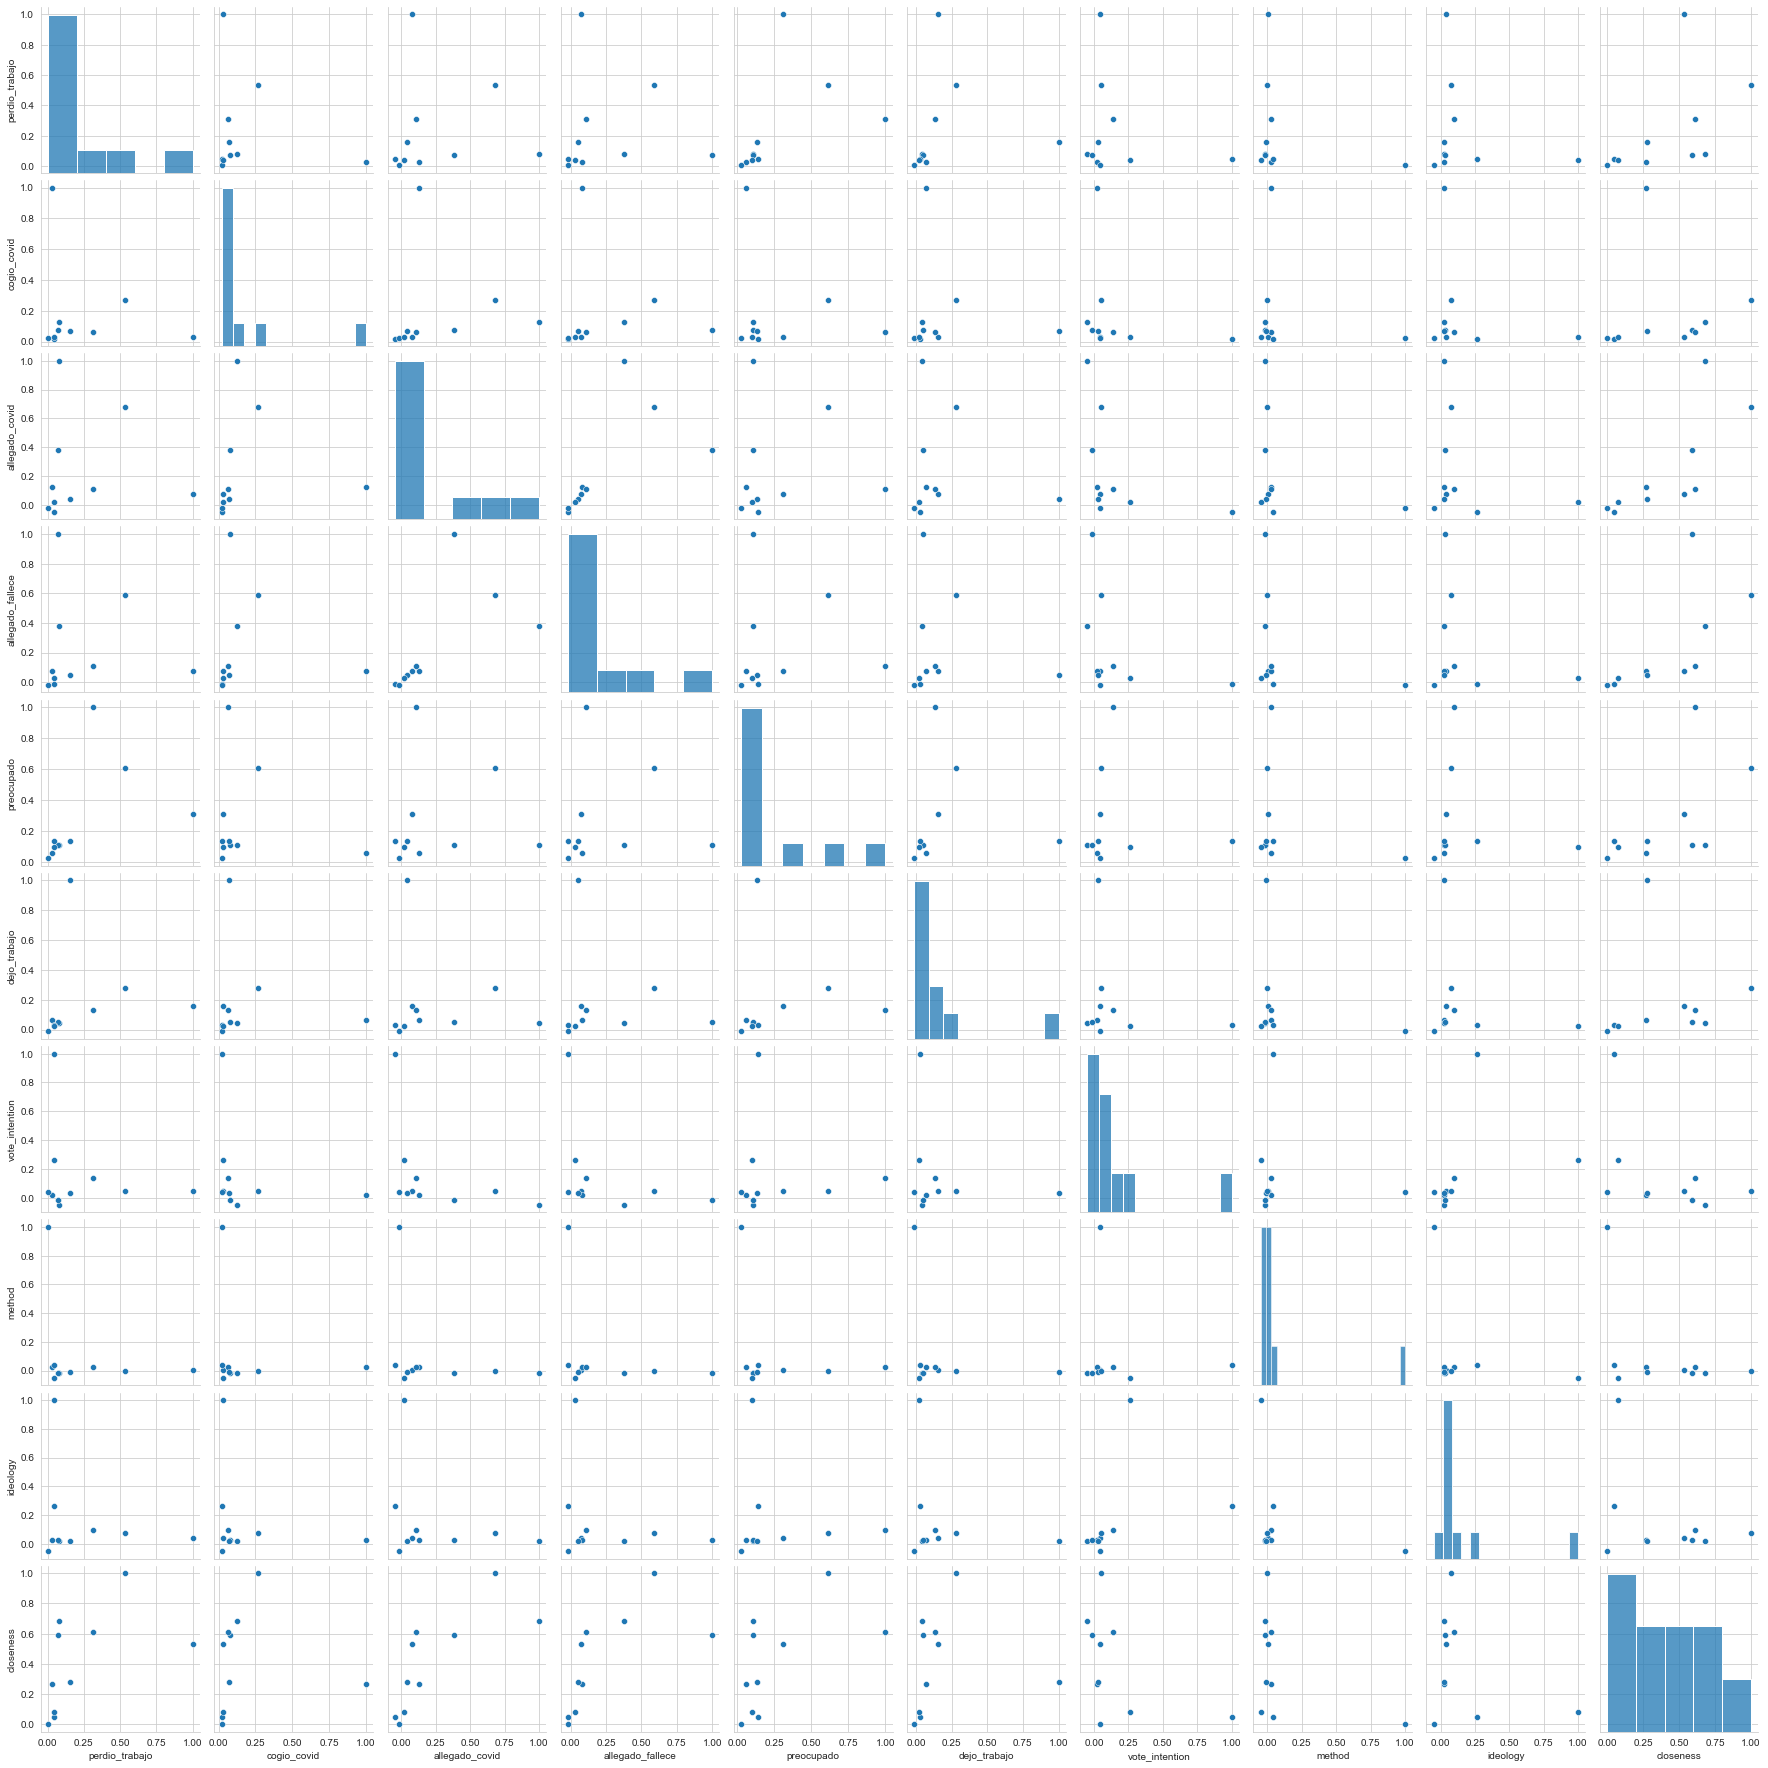

In [14]:
sns.pairplot(df.corr())
plt.show()

----------------------------------------------------------

### ESTUDIO BIVARIANTE

In [15]:
# Contraste para evaluar la relación entre dos variables categóricas:
def ContrasteChi(v1,v2,df):
    agrup=df.groupby([v1,v2])[['cogio_covid']].count()
    agrup.rename(columns={'cogio_covid':'recuento'},inplace=True)
    agrup.reset_index(inplace=True)
    freqAbsolutas=agrup.pivot(index= v1, columns=v2, values='recuento')  
    chi, p, dof, ex = scipy.stats.chi2_contingency(freqAbsolutas, correction=False)
    if (p <0.05):
        print('Rechazo H0. Existe una relación significativa entre '+v1+' y '+v2+'.')     
    else:
        print('No podemos rechazar H0. No podemos afirmar que haya una relación significativa entre '+ v1+' y '+v2+'.')

In [16]:
# Contraste para evaluar la relación entre una variable categórica y otra cuantitativa:
def ContrasteT(g1,g2,g3,VI,df):
        
    e1, p1 = scipy.stats.normaltest(df['closeness'])
    e2, p2 = scipy.stats.levene(g1, g2)
    e3, p3 = scipy.stats.levene(g1, g3)
    e4, p4 = scipy.stats.levene(g2, g3)
    
    print('La media de '+VI+' del primer grupo es', round(np.mean(g1),2))
    print('La media de '+VI+' del segundo grupo es', round(np.mean(g2),2))
    print('La media de '+VI+' del tercer grupo es', round(np.mean(g3),2))
    print('')
    
    if ((p1 <0.05) & (p2 < 0.05) & (p3 < 0.05) & (p4 < 0.05)):
        print('No se han cumplido los supuestos por lo que aplicamos la prueba no paramétrica Kruskal Wallis')
        e, p = scipy.stats.kruskal(g1,g2,g3)
        if p <0.05:
            print('Rechazo H0. Hay evidencia a favor de que al menos un grupo de la votantes tiene una media de '+VI+'  significativamente diferentes al resto.')
        else:
            print('No podemos rechazar H0. No podemos afirmar que las medias de '+VI+' en cada grupo de votante sean significativamente diferentes.')
    else:
        print('Se han cumplido los supuestos por lo que aplicamos la prueba paramétrica ANOVA.')
        e, p = scipy.stats.f_oneway(g1,g2,g3)
        if p <0.05:
            print('Rechazo H0. Hay evidencia a favor de que al menos un grupo de la votantes tiene una media de '+VI+'  significativamente diferentes al resto.')
        else:
            print('No podemos rechazar H0. No podemos afirmar que las medias de '+VI+' en cada grupo de votante sean significativamente diferentes.')


##### Intención de voto y cercanía al covid

Hipótesis: la gente que ha tenido mayor cercanía con el covid tenderá a votar a Biden parece haberse tomado más en serio las políticas de control de la pandemia.

In [17]:
def barras(x, etiquetas,titulo ,posicion):
    plt.subplot(2,2,posicion)
    sns.barplot(data= df, x= x, y= 'closeness', palette='pastel')
    plt.ylabel('Media de cercanía al covid')
    plt.title(titulo, fontweight = 'bold')
    plt.axis([-1, 3, 0, 6])
    plt.xticks([0,1,2], labels=etiquetas)
    sns.set_style('whitegrid')

def cajas(x, etiquetas,titulo ,posicion):
    plt.subplot(2,2,posicion)
    sns.boxplot(data= df, x= x,y= 'closeness', palette='pastel')
    plt.ylabel('Cercanía al covid')
    plt.title(titulo, fontweight = 'bold')
    plt.xticks([0,1,2], labels=etiquetas)
    sns.set_style('whitegrid')

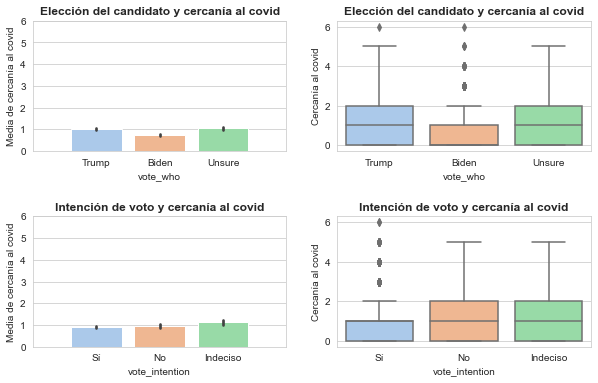

In [18]:
plt.figure(figsize=(10,6))
barras('vote_who',['Trump', 'Biden','Unsure'],'Elección del candidato y cercanía al covid',1)
cajas('vote_who',['Trump', 'Biden','Unsure'],'Elección del candidato y cercanía al covid',2)
barras('vote_intention',['Sí', 'No','Indeciso'],'Intención de voto y cercanía al covid',3)
cajas('vote_intention',['Sí', 'No','Indeciso'],'Intención de voto y cercanía al covid',4)
plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.2)
plt.show()

In [19]:
unsure=df['closeness'][df.vote_who=='Unsure']
biden=df['closeness'][df.vote_who=='Biden']
trump=df['closeness'][df.vote_who=='Trump']

ContrasteT(unsure,biden,trump, 'closeness', df)

La media de closeness del primer grupo es 1.05
La media de closeness del segundo grupo es 1.02
La media de closeness del tercer grupo es 0.72

Se han cumplido los supuestos por lo que aplicamos la prueba paramétrica ANOVA.
Rechazo H0. Hay evidencia a favor de que al menos un grupo de la votantes tiene una media de closeness  significativamente diferentes al resto.


In [20]:
si=df['closeness'][df.vote_intention==1]
no=df['closeness'][df.vote_intention==2]
indeciso=df['closeness'][df.vote_intention==3]

ContrasteT(si,no,indeciso, 'closeness', df)

La media de closeness del primer grupo es 0.91
La media de closeness del segundo grupo es 0.96
La media de closeness del tercer grupo es 1.12

Se han cumplido los supuestos por lo que aplicamos la prueba paramétrica ANOVA.
Rechazo H0. Hay evidencia a favor de que al menos un grupo de la votantes tiene una media de closeness  significativamente diferentes al resto.


Parece que, al contrario de lo que se esperaba, el grupo de personas que votó a Biden es el grupo que menos contacto ha tenido con el covid. Las diferencias en la cercanía al covid en los grupos de voto son estadísticamente significativas. De modo que parece que sí hay relación entre el candidato que se va a elegir y la cercanía al covid.

El grupo que tiene intención de votar es el que menos contacto ha tenido con el covid y el de las personas indecisas es el que más ha sufrido las consecuencias de la pandemia. Además uno de los grupos tiene una media significativamente diferente al resto, con lo que conluimos que existe una relación entre la intención de voto y la cercanía al covid. 

A pesar de que los contrastes estadísticos hayan dado resultados positivos, en los gráficos se puede observar que la diferencia en las medias de cercanía al covid no son muy diferentes en los grupos de las VI.

----------------------------------------------------------

##### Análisis por separado de la intención de voto y cada consecuencia del covid

In [21]:
df.loc[:,'perdio_trabajo':'dejo_trabajo']=df.loc[:,'perdio_trabajo':'dejo_trabajo'].replace(0,'No') 
df.loc[:,'perdio_trabajo':'dejo_trabajo']=df.loc[:,'perdio_trabajo':'dejo_trabajo'].replace(1,'Sí') 

In [22]:
def graf(x, titulo, posicion):
    plt.subplot(2,3,posicion)
    sns.barplot(data= df, x= x,y= 'vote_intention',hue='vote_who',estimator = len, ci = 'sd', palette='Set2')
    plt.ylabel('Cantidad')
    plt.title(titulo, fontweight = 'bold')

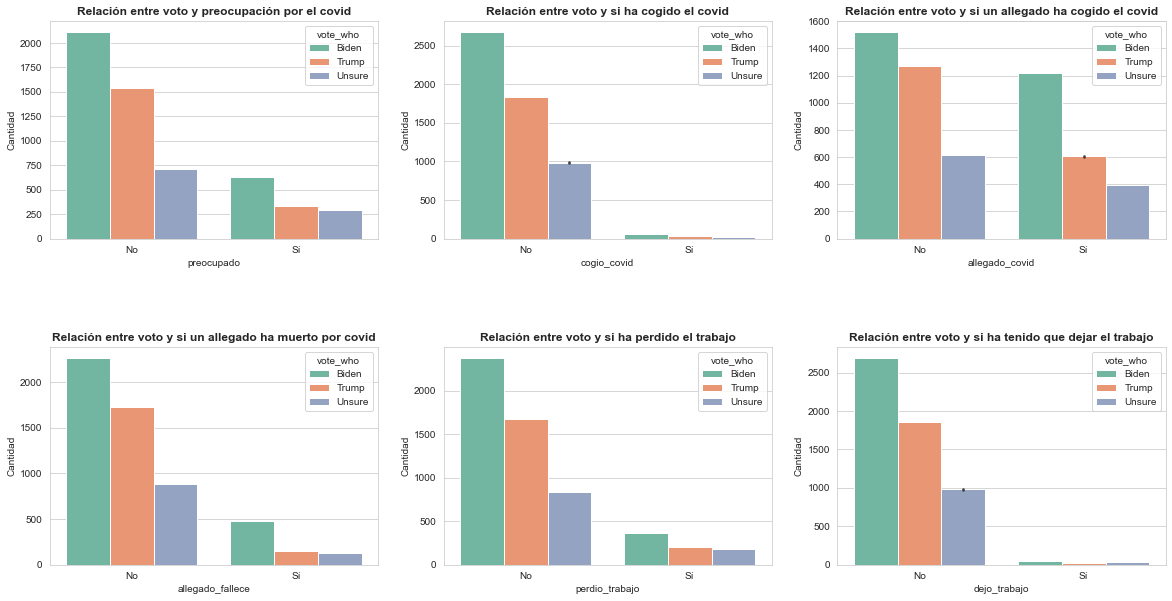

In [23]:
plt.figure(figsize=(20,10))

graf('preocupado','Relación entre voto y preocupación por el covid', 1)
graf('cogio_covid','Relación entre voto y si ha cogido el covid', 2)
graf('allegado_covid','Relación entre voto y si un allegado ha cogido el covid', 3)
graf('allegado_fallece','Relación entre voto y si un allegado ha muerto por covid', 4)
graf('perdio_trabajo','Relación entre voto y si ha perdido el trabajo', 5)
graf('dejo_trabajo','Relación entre voto y si ha tenido que dejar el trabajo', 6)

plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.2)
plt.show()

In [24]:
ContrasteChi('preocupado', 'vote_who',df)
ContrasteChi('cogio_covid', 'vote_who',df)
ContrasteChi('allegado_covid', 'vote_who',df)
ContrasteChi('allegado_fallece', 'vote_who',df)
ContrasteChi('perdio_trabajo', 'vote_who',df)
ContrasteChi('dejo_trabajo', 'vote_who',df)

Rechazo H0. Existe una relación significativa entre preocupado y vote_who.
No podemos rechazar H0. No podemos afirmar que haya una relación significativa entre cogio_covid y vote_who.
Rechazo H0. Existe una relación significativa entre allegado_covid y vote_who.
Rechazo H0. Existe una relación significativa entre allegado_fallece y vote_who.
Rechazo H0. Existe una relación significativa entre perdio_trabajo y vote_who.
Rechazo H0. Existe una relación significativa entre dejo_trabajo y vote_who.


En los gráficos no  parece que exista relación entre la prevalencia de las consecuencias del covid y la elección del voto. En todas las casillas se puede observar como la intención de voto se mantiene casi igual independientemente de si la circunstancia que describe la VI cambia. Por ejemplo, en el primer gráfico observamos como independientemente de si están preocupados o no, la mayor parte de los participantes quieren votar a Biden, seguido de Trump y de Indecisos. Que no haya no haber diferencias en la intención de voto entre las personas preocupadas y las no preocupadas nos hace pensar que no existe relación entre estas dos variables. Lo mismo ocurriría con el resto.

No obstante, a pesar de lo que se acaba de mencionar, parece que estas diferencias sí son significativas para todas las VI, menos para la variable cogio_covid.

----------------------------------------------------------

##### Estudio 2: ¿La gente con menos ingresos ha estado en mayor contacto con el covid?

In [25]:
ingresos=['$125k or more', '$75-125k', '$40-75k', 'Less than $40k']
df.income_cat=pd.Categorical(df.income_cat, ingresos, ordered=True)

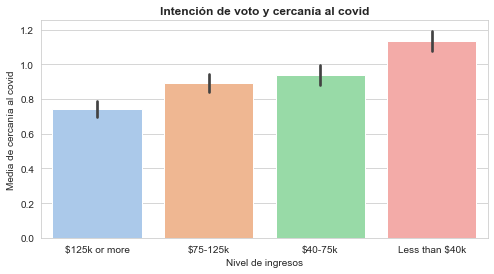

In [26]:
plt.figure(figsize=(8,4))
sns.barplot( data= df, x= 'income_cat',y= 'closeness',  palette='pastel')
plt.xlabel('Nivel de ingresos')
plt.ylabel('Media de cercanía al covid')
plt.title('Intención de voto y cercanía al covid', fontweight = 'bold')
sns.set_style('whitegrid')
plt.show()

In [37]:
# Contraste para evaluar la relación entre una variable categórica de 4 niveles y otra cuantitativa:
def ContrasteT(g1,g2,g3,g4,VI,df):
        
    e1, p1 = scipy.stats.normaltest(df['closeness'])
    e2, p2 = scipy.stats.levene(g1, g2)
    e3, p3 = scipy.stats.levene(g1, g3)
    e4, p4 = scipy.stats.levene(g2, g3)
    
    print('La media de '+VI+' del primer grupo es', round(np.mean(g1),2))
    print('La media de '+VI+' del segundo grupo es', round(np.mean(g2),2))
    print('La media de '+VI+' del tercer grupo es', round(np.mean(g3),2))
    print('La media de '+VI+' del cuarto grupo es', round(np.mean(g4),2))
    print('')
    
    if ((p1 <0.05) & (p2 < 0.05) & (p3 < 0.05) & (p4 < 0.05)):
        print('No se han cumplido los supuestos por lo que aplicamos la prueba no paramétrica Kruskal Wallis')
        e, p = scipy.stats.kruskal(g1,g2,g3,g4)
        if p <0.05:
            print('Rechazo H0. Hay evidencia a favor de que al menos un grupo de la votantes tiene una media de '+VI+'  significativamente diferentes al resto.')
        else:
            print('No podemos rechazar H0. No podemos afirmar que las medias de '+VI+' en cada grupo de votante sean significativamente diferentes.')
    else:
        print('Se han cumplido los supuestos por lo que aplicamos la prueba paramétrica ANOVA.')
        e, p = scipy.stats.f_oneway(g1,g2,g3,g4)
        if p <0.05:
            print('Rechazo H0. Hay evidencia a favor de que al menos un grupo de la votantes tiene una media de '+VI+'  significativamente diferentes al resto.')
        else:
            print('No podemos rechazar H0. No podemos afirmar que las medias de '+VI+' en cada grupo de votante sean significativamente diferentes.')


In [43]:
alto=df['closeness'][df.income_cat=='$125k or more']
medio_alto=df['closeness'][df.income_cat=='$75-125k']
medio_bajo=df['closeness'][df.income_cat=='$40-75k']
bajo=df['closeness'][df.income_cat=='Less than $40k']
ContrasteT(alto,medio_alto, medio_bajo,bajo,'closeness',df)

La media de closeness del primer grupo es 0.74
La media de closeness del segundo grupo es 0.89
La media de closeness del tercer grupo es 0.94
La media de closeness del cuarto grupo es 1.14

Se han cumplido los supuestos por lo que aplicamos la prueba paramétrica ANOVA.
Rechazo H0. Hay evidencia a favor de que al menos un grupo de la votantes tiene una media de closeness  significativamente diferentes al resto.


Efectivamente, parece que la gente con menores ingresos es la que ha tenido más presente los problemas generados por la pandemia. Además, se observa que a medida que los ingresos de las personas aumentan, menor es su cercanía con ellos.

La relación entre las variables cercanía y nivel de ingresos es significativa.

----------------------------------------------------------

##### Estudio 3: ¿Por qué método de voto se decanta cada ideología?

In [44]:
df.loc[:,'method']=df.loc[:,'method'].replace(1,'Por correo')
df.loc[:,'method']=df.loc[:,'method'].replace(2,'En persona (día de las eleccciones)')
df.loc[:,'method']=df.loc[:,'method'].replace(3,'En persona (días antes)')
df.loc[:,'method']=df.loc[:,'method'].replace(4,'Otros')

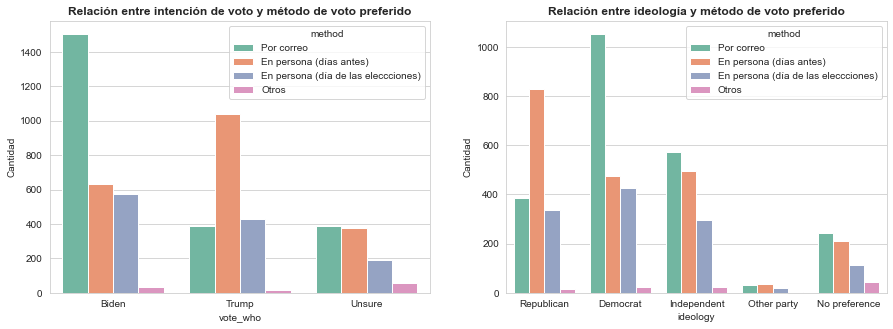

In [45]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data= df, x= 'vote_who',hue='method',palette='Set2')
plt.ylabel('Cantidad')
plt.title('Relación entre intención de voto y método de voto preferido', fontweight = 'bold')

plt.subplot(1,2,2)
sns.countplot(data= df, x= 'ideology',hue='method',palette='Set2')
plt.ylabel('Cantidad')
plt.xticks([0,1,2,3,4], labels=['Republican', 'Democrat','Independent', 'Other party', 'No preference'])
plt.title('Relación entre ideología y método de voto preferido', fontweight = 'bold')
plt.show()

In [46]:
ContrasteChi('vote_who','method',df)

Rechazo H0. Existe una relación significativa entre vote_who y method.


In [47]:
ContrasteChi('ideology','method',df)

Rechazo H0. Existe una relación significativa entre ideology y method.


En estas gráficas se puede observar como, tal como se predijo, los demócratas que iban a votar a Biden, prefirieron el voto por correo antes que los métodos de voto que requerían ir en persona. Por otro lado, las personas que querían votar a Trump (republicanos) preferían votar en persona.

----------------------------------------------------------

##### Estudio 4: ¿De qué ideología es la gente que cogió el covid? 

Para estudiar en qué ideología hay más gente que enfermó por covid, se va a calcular el porcentaje de personas que han dado positivo de cada ideología:

In [ ]:
df.loc[:,'cogio_covid']=df.loc[:,'cogio_covid'].replace('No',0) 
df.loc[:,'cogio_covid']=df.loc[:,'cogio_covid'].replace('Sí',1) 

In [ ]:
ideologiaSuma=df.groupby(['ideology'])[['cogio_covid']].sum()
ideologiaCount=df.groupby(['ideology'])[['cogio_covid']].count()
ideologiaSuma['porcentaje']=ideologiaSuma.cogio_covid/ideologiaCount.cogio_covid

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(data= ideologiaSuma, x= ['Republican', 'Democrat','Independent', 'Other party', 'No preference'],y='porcentaje', palette='pastel')
plt.ylabel('Procorción que cogió el covid')
plt.xlabel('Ideología')
plt.title('Proporción que dió positivo de cada ideología', fontweight = 'bold')

No se han obtenido los resultados que se esperaba. Parece que son precisamente los repubicanos los que menos han cogido el virus, por debajo incluso que los demócratas. Los que más han cogido son los que apoyan a otros partidos. No obstante, este es precisamente el grupo más reducido de modo por lo que este resultado podría ser fruto del azar.

Para analizar este aspecto se va a realizar un contraste para averiguar si las variables ideología y haber cogido el covid están relacionadas.

In [48]:
ContrasteChi('ideology','cogio_covid',df)

No podemos rechazar H0. No podemos afirmar que haya una relación significativa entre ideology y cogio_covid.


Al obtener un nivel crítico de 0.067 mantenemos que no se puede concluir que la ideología y haber cogido el covid estén relacionadas.